**Table of Contents** 


1.   Business Goal
2.   Load the data and understand the variables
3.   Data Inspection and cleaning
4.   EDA
5.   Train-Test-Split
6.   Scaling if required
7.   Modelling
8.   Tuning with Regularization ( Ridge & Lasso )
9.   Model Evaluation



## 1. Business Goal

**Background**: A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


**Business Goal**: Model the price of houses with the avaialbel independent vairbales.

**Analytical Goal**:
1. A regression model using regularization in order to perdict the actual value of the prospective properties and decide whether to invest in them or not.
2. which variables are significant in predicting the prices of a house
3. How well those variables describe the price of a house

## 2. Load the data and understand the variables

In [58]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore') # This library will be used to ignore some warnings


In [59]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import r2_score
from sklearn import metrics


In [60]:
from platform import python_version
print("python: ",python_version())
print("numpy: ",np.__version__) #numpy version
print("pandas: ",pd.__version__) #pandas version
print("matplotlib: ",matplotlib.__version__) #matplotlib version
print("seaborn: ",sns.__version__)
print("plotly: ",plotly.__version__)

python:  3.7.13
numpy:  1.21.6
pandas:  1.3.5
matplotlib:  3.2.2
seaborn:  0.11.2
plotly:  5.5.0


In [61]:
# I have used google colab, commenting these connection line so that, local run to happen smoothly
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
#housing = pd.read_csv("/content/drive/MyDrive/ML/DataSets/train.csv")
# for local runs instead of google colab
housing = pd.read_csv("train.csv")

## 3. Data inspection and Cleaning

In [63]:
housing.shape

(1460, 81)

In [64]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [65]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,...,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,...,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,...,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,...,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,...,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


81 dependent variables. Lets Verify for incorrect data ( null, NAN etc)

In [66]:

housing[housing.columns[housing.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Too many missing values for below columns 


1.   MiscFeature
2.   Fence
3.   PoolQC
4.   FirePlaceQu
5.   Alley

Let's delete these columns

In [67]:
housing.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley','Id'], axis=1, inplace=True)  

In [68]:
housing._get_numeric_data().columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [69]:
num_col=list(housing.dtypes[housing.dtypes !='object'].index)

In [70]:
pd.options.display.max_columns=40
housing[housing.select_dtypes(include=["bool_","object_"]).columns.tolist()].describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,870,605,1311,1326,1340,1267,1198




*   Variables
    *   Numeric
        *   **Continuous** :Observations can take any value between a certain set of real numbers (height, age, temperature, etc).
        *   **Discrete** : consist of integers only (number of kids, cars, pets... )
    *   Categorical
        *   **Ordinal** : Can be ranked (grades,pizza size,levels of satisfaction)
        *   **Nominal**:  can't be ranked (race,religion, sex)










*   Housing prices Variables
    *    Numeric
         *    **Continuous** : {YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold}
         *    **Discrete**   : {LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath21, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal}
    *    Categorical
         *    **Ordinal**: {LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, CentralAir, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence}
         *    **Nominal**: {MSSubClass,MSZoning, Street, Alley, LandContour, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType,Foundation, Heating, Electrical, GarageType, MiscFeature, SaleType, SaleCondition}



## 4. Exploratory Data Analysis

##### **Ordinal Categorical Variables**

Lets convert Ordinal Categorical Variables to Numerics

In [71]:
ord_cat_columns=['LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']

**LandSlope** : Slope of property
<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> GT1 </td><td> Gentle slope </td></tr>
<tr><td> Mod </td><td> Moderate Slope </td></tr>
<tr><td> Sev </td><td> Severe Slope </td></tr>
</table>


In [72]:
housing['LandSlope']=housing.LandSlope.map({'Sev':0,'Mod':1,'Gtl':2})


 
**BsmtQual**: Evaluate the height of the basement

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Ex </td><td> Excellent (100+ inches) </td></tr>
<tr><td> Gd </td><td> Good ( 90-99 inches) </td></tr>
<tr><td> TA </td><td> Typical(80-89 inches) </td></tr>
<tr><td> Fa </td><td> Fair (70-79 inches) </td></tr>
<tr><td> Po </td><td> Poor (<70 inches)</td></tr>
<tr><td> NA </td><td> No Basement </td></tr>
</table>

In [73]:
housing['BsmtQual']=housing.BsmtQual.map({'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})


**BsmtCond**: Evaluates the general condition of the basement

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Gd </td><td> Good </td></tr>
<tr><td> TA </td><td> Typical - slight dampness allowed</td></tr>
<tr><td> Fa </td><td> Fair - dampness or some cracking or settling</td></tr>
<tr><td> Po </td><td>Poor - Severe cracking, settling, or wetness </td></tr>
<tr><td>  NA</td><td> No Basement</td></tr>
</table>


In [74]:
housing['BsmtCond']=housing.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4})


**BsmtExposure** :  Refers to walkout or garden level walls	

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Gd </td><td> Good Exposure </td></tr>
<tr><td> Av </td><td> Average Exposure (split levels or foyers typically score average or above) </td></tr>
<tr><td> Mn </td><td> Mimimum Exposure </td></tr>
<tr><td> No </td><td> No Exposure </td></tr>
<tr><td> NA </td><td> No Basement </td></tr>
</table>

In [75]:
housing['BsmtExposure']=housing.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})


**BsmtFinType1** :Rating of basement finished area
<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> GLQ </td><td> Good Living Quarters </td></tr>
<tr><td> ALQ </td><td> Average Living Quarters </td></tr>
<tr><td> BLQ </td><td> Below Average Living Quarters	 </td></tr>
<tr><td> Rec </td><td> Average Rec Room </td></tr>
<tr><td> LwQ </td><td> Low Quality </td></tr>
<tr><td> Unf </td><td> Unfinshed </td></tr>
<tr><td>NA  </td><td>  No Basement</td></tr>
</table>

In [76]:
housing['BsmtFinType1']=housing.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})


**BsmtFinType2** :Rating of basement finished area(if multiple types)

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> GLQ </td><td> Good Living Quarters </td></tr>
<tr><td> ALQ </td><td> Average Living Quarters </td></tr>
<tr><td> BLQ </td><td> Below Average Living Quarters	 </td></tr>
<tr><td> Rec </td><td> Average Rec Room </td></tr>
<tr><td> LwQ </td><td> Low Quality </td></tr>
<tr><td> Unf </td><td> Unfinshed </td></tr>
<tr><td>NA  </td><td>  No Basement</td></tr>
</table>

In [77]:
housing['BsmtFinType2']=housing.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})


**HeatingQC** :Heating quality and condition

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Ex </td><td> Excellent </td></tr>
<tr><td> Gd </td><td> Good </td></tr>
<tr><td> TA </td><td> Average/Typical </td></tr>
<tr><td> Fa </td><td> Fair </td></tr>
<tr><td> Po </td><td> Poor </td></tr>
</table>

In [78]:
housing['HeatingQC']=housing.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})


**CentralAir** :Central air conditioning

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> N </td><td> No </td></tr>
<tr><td> Y </td><td> Yes </td></tr>
</table>

In [79]:
housing['CentralAir']=housing.CentralAir.map({'N':0,'Y':1})


**KitchenQual** : Kitchen quality

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Ex </td><td> Excellent </td></tr>
<tr><td> Gd </td><td> Good </td></tr>
<tr><td> TA </td><td> Average/Typical </td></tr>
<tr><td> Fa </td><td> Fair </td></tr>
<tr><td> Po </td><td> Poor </td></tr>
</table>

In [80]:
housing['KitchenQual']=housing.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})


**GarageFinish** :Interior finish of the garage

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Fin </td><td> Finished </td></tr>
<tr><td> RFn </td><td> Rough Finished	 </td></tr>
<tr><td> Unf </td><td> Unfinished </td></tr>
<tr><td> NA </td><td> No Garage </td></tr>
</table>

In [81]:
housing['GarageFinish']=housing.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})


**GarageCond** :Garage condition

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Ex </td><td> Excellent </td></tr>
<tr><td> Gd </td><td> Good </td></tr>
<tr><td> TA </td><td> Typical/Average </td></tr>
<tr><td> Fa </td><td> Fair </td></tr>
<tr><td> Po </td><td> Poor </td></tr>
<tr><td> NA </td><td> No Garage </td></tr>
</table>

In [82]:
housing['GarageCond']=housing.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})


**ExterCond** :Evaluates the present condition of the material on the exterior

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Ex </td><td> Excellent </td></tr>
<tr><td> Gd </td><td> Good </td></tr>
<tr><td> TA </td><td> Average/Typical </td></tr>
<tr><td> Fa </td><td> Fair </td></tr>
<tr><td> Po </td><td> Poor </td></tr>
</table>

In [83]:
housing['ExterCond']=housing.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})


**LotShape** :General shape of property
	
<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Reg </td><td> Regular </td></tr>
<tr><td> IR1 </td><td> Slightly irregular </td></tr>
<tr><td> IR2 </td><td> Moderately Irregular </td></tr>
<tr><td> IR3 </td><td> Irregular </td></tr>
</table>

In [84]:
housing['LotShape']=housing.LotShape.map({'IR3':0,'IR2':1,'IR1':2,'Reg':3})

**OverallQual** : Rates the overall material and finish of the house
<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> 10 </td><td> Very Excellent </td></tr>
<tr><td> 9 </td><td> Excellent </td></tr>
<tr><td> 8 </td><td> Very Good </td></tr>
<tr><td> 7 </td><td> Good </td></tr>
<tr><td> 6 </td><td> Above Average </td></tr>
<tr><td> 5 </td><td> Average </td></tr>
<tr><td> 4 </td><td> Below Average </td></tr>
<tr><td> 3 </td><td> Fair </td></tr>
<tr><td> 2 </td><td> Poor </td></tr>
<tr><td> 1 </td><td> Very Poor </td></tr>
</table>

This column doesn't require any changes

**OverallCond**: Rates the overall condition of the house
<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> 10 </td><td> Very Excellent </td></tr>
<tr><td> 9 </td><td> Excellent </td></tr>
<tr><td> 8 </td><td> Very Good </td></tr>
<tr><td> 7 </td><td> Good </td></tr>
<tr><td> 6 </td><td> Above Average </td></tr>
<tr><td> 5 </td><td> Average </td></tr>
<tr><td> 4 </td><td> Below Average </td></tr>
<tr><td> 3 </td><td> Fair </td></tr>
<tr><td> 2 </td><td> Poor </td></tr>
<tr><td> 1 </td><td> Very Poor </td></tr>
</table>

**Observation**: This column doesn't require any changes

**ExterQual**: Evaluates the quality of the material on the exterior 

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Ex </td><td> Excellent </td></tr>
<tr><td> Gd </td><td> Good </td></tr>
<tr><td> TA </td><td> Average/Typical </td></tr>
<tr><td> Fa </td><td> Fair </td></tr>
<tr><td> Po </td><td> Poor </td></tr>
</table>

In [85]:
housing['ExterQual']=housing.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

**Functional**: Home functionality (Assume typical unless deductions are warranted)

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Typ </td><td> Typical Functionality </td></tr>
<tr><td> Min1 </td><td> Minor Deductions 1 </td></tr>
<tr><td> Min2 </td><td> Minor Deductions 2 </td></tr>
<tr><td> Mod </td><td> Moderate Deductions </td></tr>
<tr><td> Maj1 </td><td> Major Deductions 1 </td></tr>
<tr><td> Maj2 </td><td> 	Major Deductions 2 </td></tr>
<tr><td> Sev </td><td> Severely Damaged </td></tr>
<tr><td> Sal </td><td> Salvage only </td></tr>
</table>
       	
       	
       	
       	
       	
       
       	
       	

In [86]:
housing['Functional']=housing.Functional.map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})

**FireplaceQu** :  Fireplace quality
<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Ex </td><td> Excellent - Exceptional Masonry Fireplace </td></tr>
<tr><td> Gd </td><td> Good - Masonry Fireplace in main level </td></tr>
<tr><td> TA </td><td> Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement </td></tr>
<tr><td> Fa </td><td> Fair - Prefabricated Fireplace in basement </td></tr>
<tr><td> Po </td><td> Poor - Ben Franklin Stove </td></tr>
<tr><td> NA </td><td> No Fireplace </td></tr>
</table>

Observation: Column deleted already due to too many missing values

**PoolQC**: Pool quality
		
<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Ex </td><td> Excellent </td></tr>
<tr><td> Gd </td><td> Good </td></tr>
<tr><td> TA </td><td> Average/Typical </td></tr>
<tr><td> Fa </td><td> Fair </td></tr>
<tr><td> Po </td><td> Poor </td></tr>
</table>
Observation : This column already deleted due to too many missing values

**Fence**: Fence quality

<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> GdPrv </td><td> 	Good Privacy </td></tr>
<tr><td> MnPrv </td><td> Minimum Privacy </td></tr>
<tr><td> GdWo </td><td> Good Wood </td></tr>
<tr><td> MnWw </td><td> Minimum Wood/Wire </td></tr>
<tr><td> NA </td><td> No Fence </td></tr>
</table>
Observation: column deleted already

**GarageQual**: Garage quality
<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Ex </td><td> Excellent </td></tr>
<tr><td> Gd </td><td> Good </td></tr>
<tr><td> TA </td><td> Average/Typical </td></tr>
<tr><td> Fa </td><td> Fair </td></tr>
<tr><td> Po </td><td> Poor </td></tr>
<tr><td> NA </td><td> No Garage </td></tr>
</table>


In [87]:
housing['GarageQual']=housing.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

**PavedDrive**: Paved driveway
<table ><tr><th>Code </th><th> Description </th></tr>
<tr><td> Y </td><td> Paved </td></tr>
<tr><td> P </td><td> Partial Pavement </td></tr>
<tr><td> N </td><td> Dirt/Gravel </td></tr>
</table>


In [88]:
housing['PavedDrive']=housing.PavedDrive.map({'N':0,'P':1,'Y':2})

In [89]:
housing[housing.columns[housing.isnull().any()]].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [90]:
housing[ord_cat_columns]=housing[ord_cat_columns].fillna(0)

In [91]:
housing[housing.columns[housing.isnull().any()]].isnull().sum()

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageType      81
GarageYrBlt     81
dtype: int64

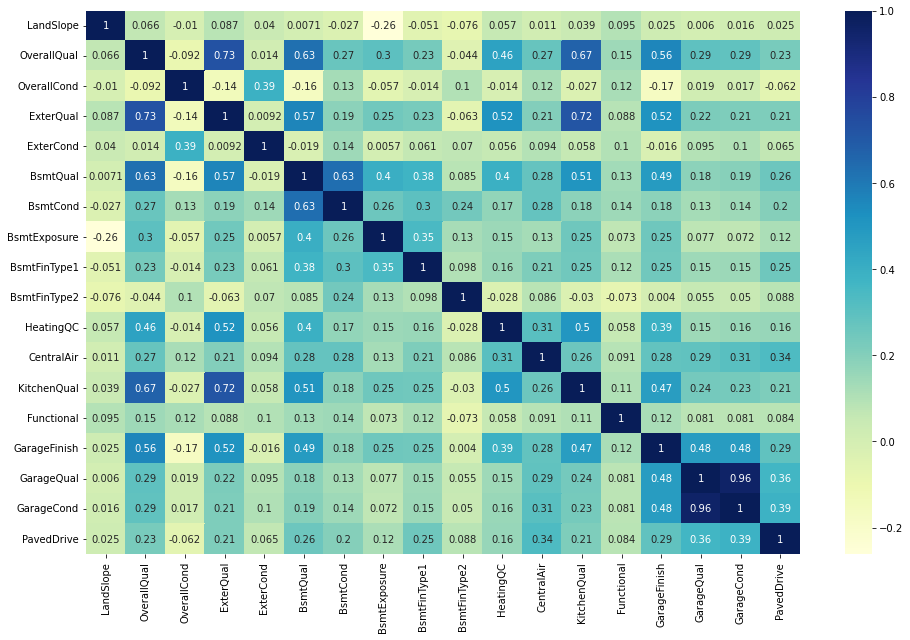

In [92]:
plt.figure(figsize = (16, 10))
sns.heatmap(housing[ord_cat_columns].corr(), annot = True, cmap="YlGnBu")
plt.show()


Lets Drop highly correlated columns

In [93]:
housing.drop(['GarageCond','KitchenQual','ExterQual','BsmtQual','GarageFinish','HeatingQC'], axis=1, inplace=True)  

In [94]:
for col in ['GarageCond','KitchenQual','ExterQual','BsmtQual','GarageFinish','HeatingQC']:
    ord_cat_columns.remove(col)


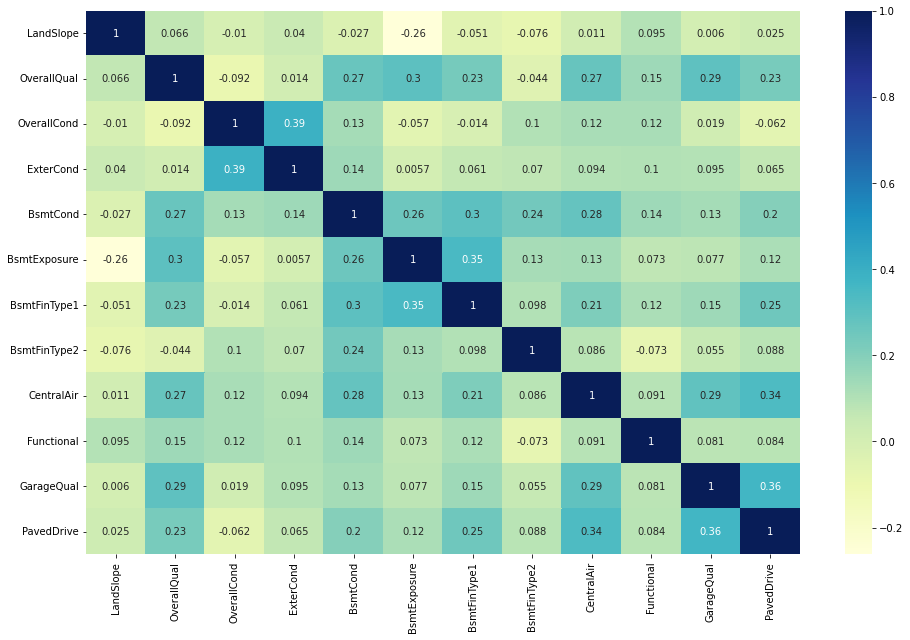

In [95]:
plt.figure(figsize = (16, 10))
sns.heatmap(housing[ord_cat_columns].corr(), annot = True, cmap="YlGnBu")
plt.show()


##### **Continuous Numeric Variables**

**Continuous** : {YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold}

YearBuilt, GarageYrBlt, YearRemodAdd <-- Static info. Do not describe characterstics of variable. Lets derive Age factor from above values

In [96]:
housing.loc[:,'BuildingAge']=housing['YearBuilt'].max() - housing['YearBuilt']
housing.loc[:, 'BuildingRenovated']=housing['YearRemodAdd'].max() - housing['YearRemodAdd']

In [97]:
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'], axis=1, inplace=True)  

##### **Nominal Categorical Variables**

> Indented block



{MSSubClass,MSZoning, Street, Alley, LandContour, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType,Foundation, Heating, Electrical, GarageType, MiscFeature, SaleType, SaleCondition}

In [98]:
#'MSSubClass' <-- This is also nominal categorical variable with numerics, Hence I am not adding to below list
nom_cat_columns=['MSZoning', 'Street',  'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation', 'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

In [99]:
housing[housing.columns[housing.isnull().any()]].isnull().sum()

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageType      81
dtype: int64

##### **Data Imputing for missing entries**

**Column : LotFrontage** (Linear feet of street connected to property)
18% of data is missing. let's delete this column

In [100]:
housing.drop(['LotFrontage'], axis=1, inplace=True)  

MasVnrType : Masonry veneer type

|code|Description|
|----|----|
|BrkCmn|Brick Common|
|BrkFace	|Brick Face|
|CBlock	|Cinder Block|
|None	|None|
|Stone|	Stone|

In [101]:
housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

Most of the houses has MasvnrType as None, hence delete 

In [102]:
housing.drop(['MasVnrType'], axis=1, inplace=True)  

Column: **Electrical**: Electrical system

|Code|Description|
|-----|----|
|SBrkr|Standard Circuit Breakers & Romex|
|FuseA|Fuse Box over 60 AMP and all Romex wiring (Average)|	
|FuseF|60 AMP Fuse Box and mostly Romex wiring (Fair)|
|FuseP|60 AMP Fuse Box and mostly knob & tube wiring (poor)|
|Mix|Mixed|

In [103]:
housing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [104]:
housing['Electrical'].fillna(value='SBrkr', inplace=True)

Column: GarageType (Garage location)
		
|Code|Description|
|-----|-----|
|2Types|	More than one type of garage|
|Attchd|Attached to home|
|Basment|Basement Garage|
|BuiltIn|Built-In (Garage part of house - typically has room above garage)|
|CarPort|Car Port|
|Detchd|Detached from home|
|NA|No Garage|

In [105]:
housing.GarageType.value_counts()


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [106]:
housing['GarageType'].fillna(value='NA', inplace=True)

In [107]:
housing[housing.columns[housing.isnull().any()]].isnull().sum()

MasVnrArea    8
dtype: int64

In [108]:
housing.MasVnrArea.value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [109]:
#Most of the data is empty, lets drop this variable
housing.drop(['MasVnrArea'], axis=1, inplace=True)  

###### All NA values removed ? 

In [110]:
housing[housing.columns[housing.isnull().any()]].isnull().sum()

Series([], dtype: float64)

Lets check the housing prices against each of the numeric vairables

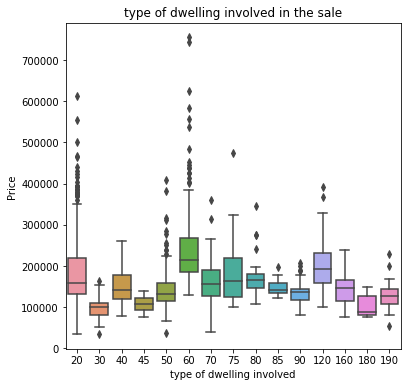

In [112]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="MSSubClass", y="SalePrice", data=housing)
plt.xlabel("type of dwelling involved")
plt.ylabel("Price")
plt.title("type of dwelling involved in the sale")
plt.show()

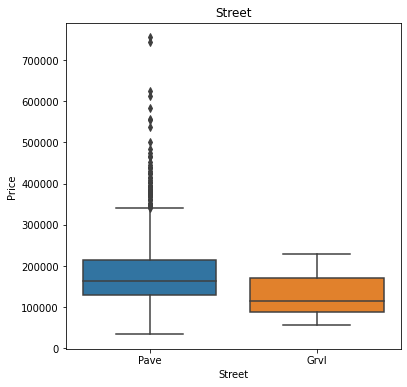

In [130]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="Street", y="SalePrice", data=housing)
plt.xlabel("Street")
plt.ylabel("Price")
plt.title("Street")
plt.show()

In [133]:
#Most of the data is with Pave, lets drop this variable
housing.drop(['Street'], axis=1, inplace=True)  

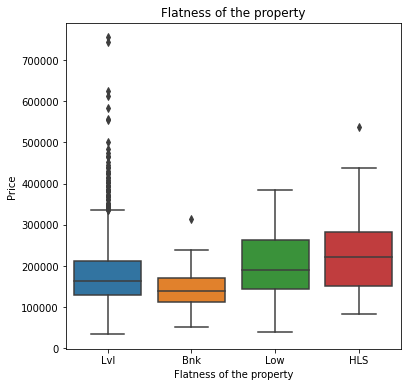

In [131]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="LandContour", y="SalePrice", data=housing)
plt.xlabel("Flatness of the property")
plt.ylabel("Price")
plt.title("Flatness of the property")
plt.show()

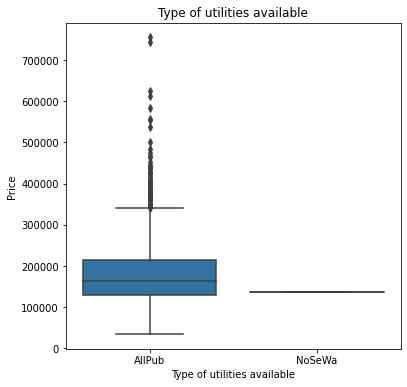

In [132]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="Utilities", y="SalePrice", data=housing)
plt.xlabel("Type of utilities available")
plt.ylabel("Price")
plt.title("Type of utilities available")
plt.show()

In [134]:
#Most of the data is with All PUb, lets drop this variable
housing.drop(['Utilities'], axis=1, inplace=True)  

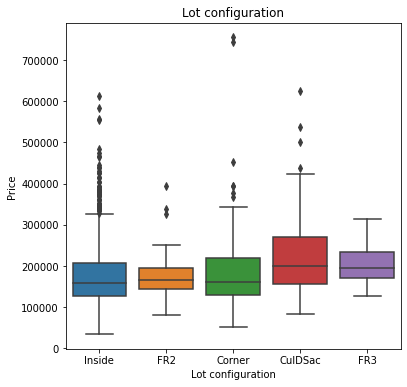

In [135]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="LotConfig", y="SalePrice", data=housing)
plt.xlabel("Lot configuration")
plt.ylabel("Price")
plt.title("Lot configuration")
plt.show()

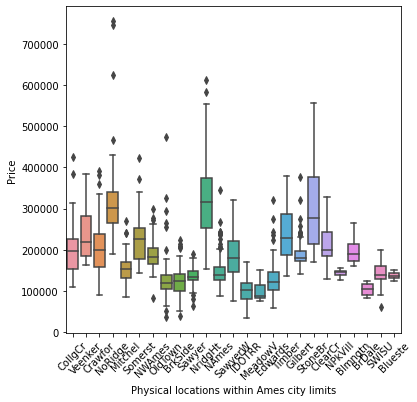

In [137]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=housing)
plt.xlabel("Physical locations within Ames city limits")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

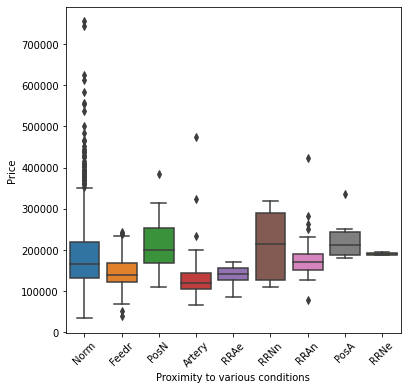

In [138]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="Condition1", y="SalePrice", data=housing)
plt.xlabel("Proximity to various conditions")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

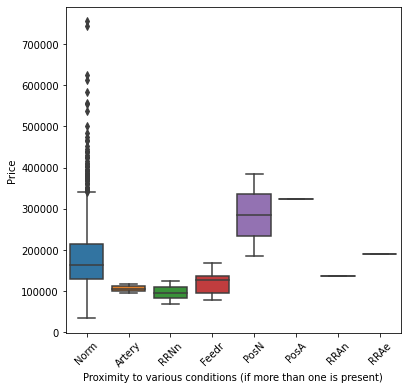

In [139]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="Condition2", y="SalePrice", data=housing)
plt.xlabel("Proximity to various conditions (if more than one is present)")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [152]:
#High values for few
housing.drop(['Condition2'], axis=1, inplace=True)  

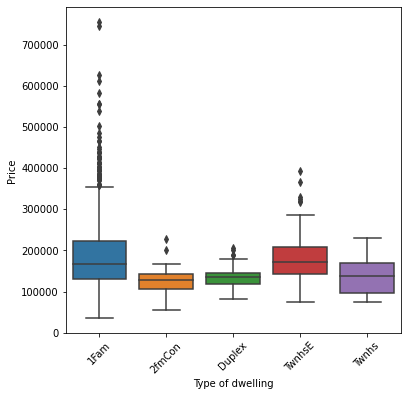

In [140]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="BldgType", y="SalePrice", data=housing)
plt.xlabel("Type of dwelling")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

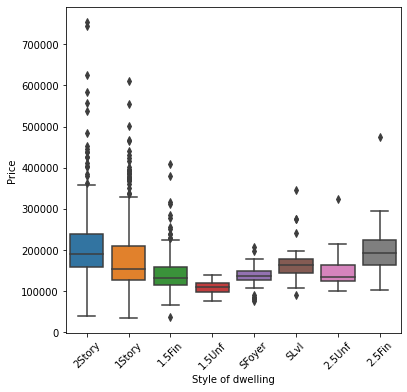

In [141]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="HouseStyle", y="SalePrice", data=housing)
plt.xlabel("Style of dwelling")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

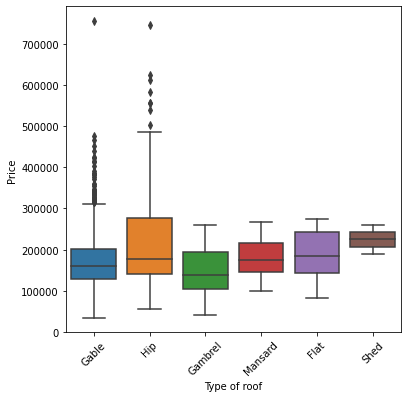

In [142]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="RoofStyle", y="SalePrice", data=housing)
plt.xlabel("Type of roof")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

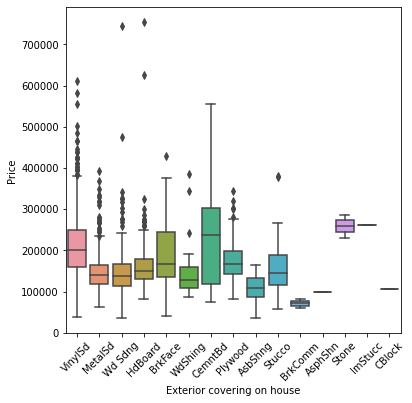

In [144]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="Exterior1st", y="SalePrice", data=housing)
plt.xlabel("Exterior covering on house")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

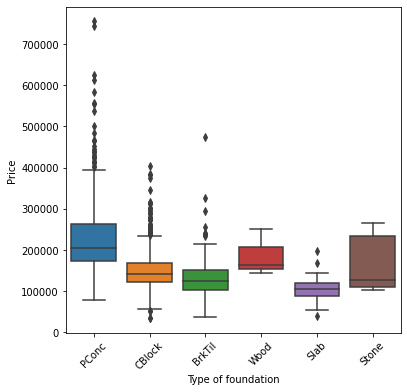

In [145]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="Foundation", y="SalePrice", data=housing)
plt.xlabel("Type of foundation")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

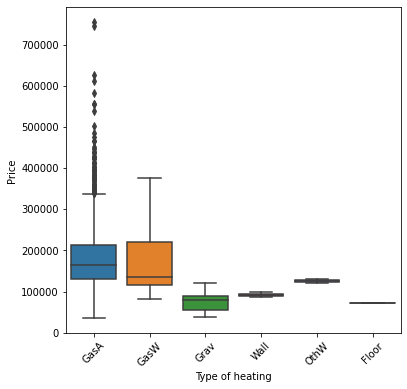

In [151]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="Heating", y="SalePrice", data=housing)
plt.xlabel("Type of heating")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [153]:
#Mostly Gas
housing.drop(['Heating'], axis=1, inplace=True)  

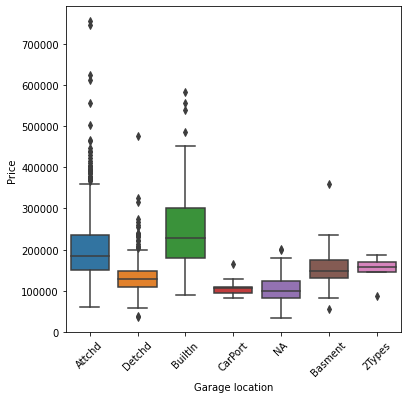

In [154]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="GarageType", y="SalePrice", data=housing)
plt.xlabel("Garage location")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

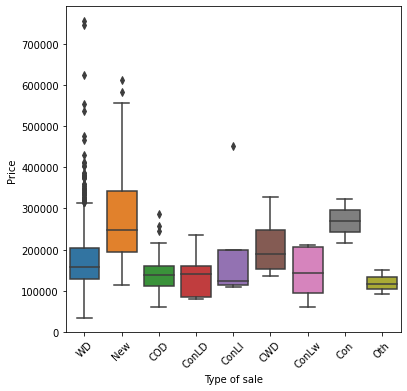

In [155]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="SaleType", y="SalePrice", data=housing)
plt.xlabel("Type of sale")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

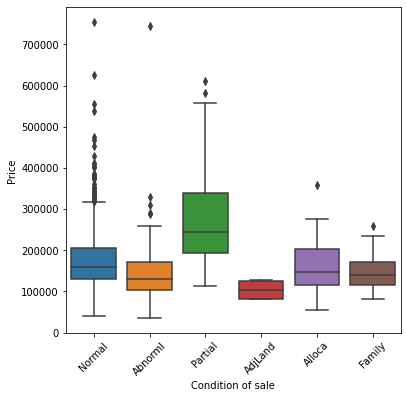

In [156]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="SaleCondition", y="SalePrice", data=housing)
plt.xlabel("Condition of sale")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [126]:
num_col=['MSSubClass','LotArea','GrLivArea','FullBath','BedroomAbvGr','GarageArea','ScreenPorch','PoolArea']


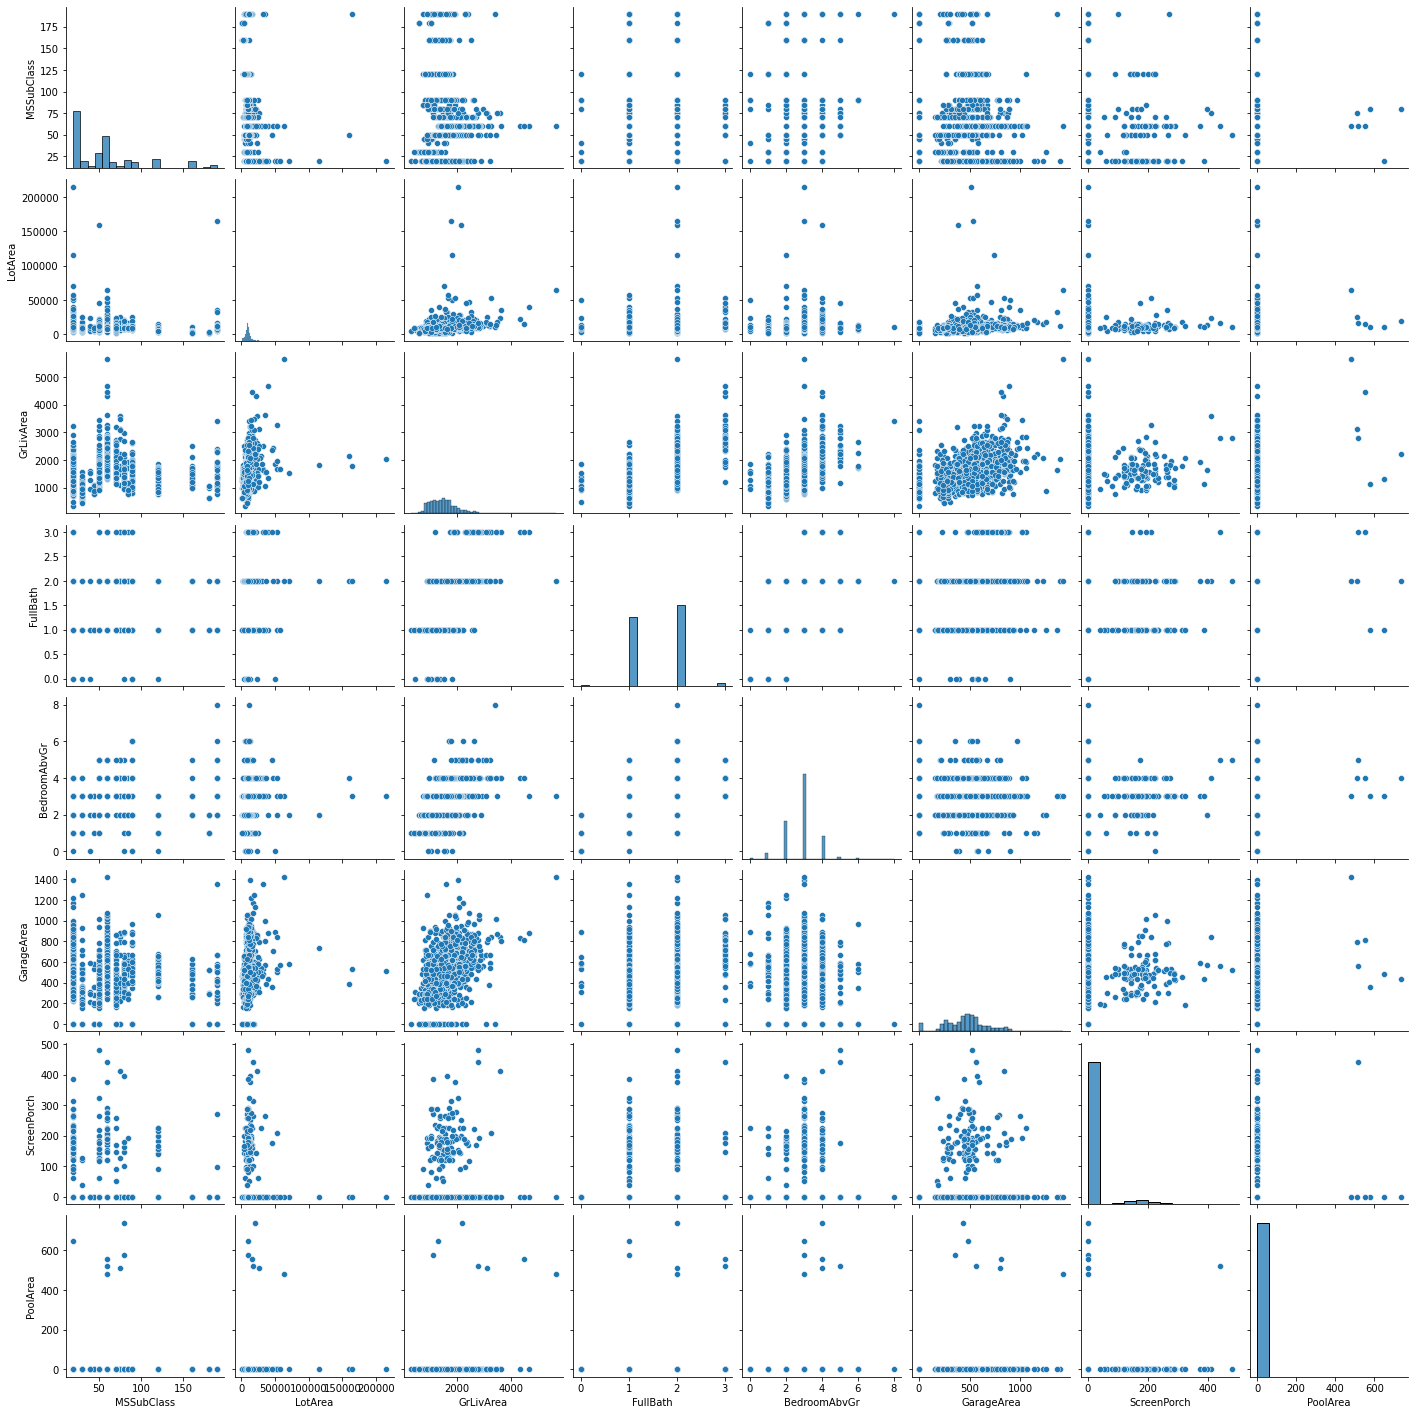

In [129]:
senom_cat_columns=['MSZoning',  'Neighborhood',  'HouseStyle', 'GarageType']

In [163]:
numeric_cols=housing._get_numeric_data().columns
print(numeric_cols)

Index(['MSSubClass', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual',
       'OverallCond', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'BuildingAge', 'BuildingRenovated'],
      dtype='object')


In [164]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
scaler = StandardScaler()
housing[numeric_cols]=scaler.fit_transform(housing[numeric_cols])

In [165]:
correlation=housing[numeric_cols].corr()
features_corr=[]
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i,j]) > 0.5:
           col =correlation.columns[i]
           features_corr.append(col)
print(features_corr)

['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GrLivArea', 'GrLivArea', 'BsmtFullBath', 'BsmtFullBath', 'FullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'BedroomAbvGr', 'TotRmsAbvGrd', 'TotRmsAbvGrd', 'TotRmsAbvGrd', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'GarageArea', 'GarageQual', 'GarageQual', 'SalePrice', 'SalePrice', 'SalePrice', 'SalePrice', 'SalePrice', 'SalePrice', 'SalePrice', 'SalePrice', 'BuildingAge', 'BuildingAge', 'BuildingAge', 'BuildingRenovated', 'BuildingRenovated', 'BuildingRenovated']


In [166]:
selected_columns = [col for col in numeric_cols if col not in features_corr]

### 5. Train Test Split

In [170]:
from sklearn.model_selection import train_test_split
target=housing.loc[:,'SalePrice'].values
X_train,X_test,y_train,y_test=train_test_split(housing[selected_columns],target,train_size=0.7,test_size=0.3)

### 6. Scalling

In [171]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### 6. Modelling

In [177]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import scipy

In [209]:
from sklearn.metrics import mean_squared_error

In [179]:
#Ridge
ridge=Ridge(alpha=0.001)
ridge.fit(X_train,y_train)
y_train_pred=ridge.predict(X_train)
y_test_prod=ridge.predict(X_test)

In [182]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_prod))


0.7403488650350555
0.7542763344159608


In [183]:
hyper_param={'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0,5.0,10.0,20.0]}

In [184]:
model=Ridge()

Fitting 5 folds for each

In [188]:
model_cv=GridSearchCV(estimator=model,param_grid=hyper_param,cv=5,verbose=1,return_train_score=True,scoring='neg_mean_absolute_error')

In [192]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [193]:
model_cv=GridSearchCV(estimator=model,param_grid=hyper_param,cv=5,verbose=1,return_train_score=True,scoring='neg_mean_absolute_error')

In [195]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [196]:
print(model_cv.best_params_)

{'alpha': 20.0}


In [197]:
ridge=Ridge(alpha=20)
ridge.fit(X_train,y_train)
print(ridge.coef_)

[-0.1370636   0.07590833 -0.02778123 -0.0043471   0.51636384  0.00397673
 -0.006766   -0.05306737  0.10444711  0.17039853 -0.00611817  0.10748402
  0.01485955  0.17945098  0.00769598 -0.01964213  0.05721545  0.02139285
  0.11098367  0.04180809  0.08956175  0.04111314 -0.00743767  0.02882755
  0.03900814  0.01419658 -0.01896949]


In [199]:
n,p=y_train.shape[0], len(rfe.support_)

In [202]:
y_pred_train=ridge.predict(X_train)
y_pred_test=ridge.predict(X_test)

In [203]:
metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print("R2 Train Score:",r2_train_lr)
metric.append(r2_train_lr)

R2 Train Score: 0.7401593873925626


In [204]:
r2_test_lr=r2_score(y_test,y_pred_test)
print("R2 Test Score:", r2_test_lr)
metric.append(r2_test_lr)

R2 Test Score: 0.7520034601196846


In [205]:
rss_1=np.sum(np.square(y_train - y_pred_train))
print("RSS Training:",rss_1)
metric.append(rss_1)

RSS Training: 247.20306874068837


In [207]:
rss_2=np.sum(np.square(y_test - y_pred_test))
print("RSS Test :", rss_2)
metric.append(rss_2)

RSS Test : 125.97628983624826


In [210]:
mse_train=mean_squared_error(y_train,y_pred_train)
print("MSE Train :", mse_train)
metric.append(mse_train**0.5)

MSE Train : 0.24211857859029223


In [211]:
mse_test=mean_squared_error(y_test,y_pred_test)
print("MSE Test :", mse_test)
metric.append(mse_test**0.5)

MSE Test : 0.2876171000827586


#### Lasso

In [215]:
lasso=Lasso()


In [216]:
model_cv=GridSearchCV(estimator=lasso,param_grid=hyper_param,cv=5,verbose=1,return_train_score=True,scoring='neg_mean_absolute_error')

In [217]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [218]:
GridSearchCV(cv=5,estimator=Lasso(),param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [219]:
print(model_cv.best_params_)

{'alpha': 0.01}


In [220]:
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [221]:
y_pred_train=lasso.predict(X_train)
y_pred_test=lasso.predict(X_test)
metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print("R2 Train Score:",r2_train_lr)
metric.append(r2_train_lr)
r2_test_lr=r2_score(y_test,y_pred_test)
print("R2 Test Score:", r2_test_lr)
metric.append(r2_test_lr)
rss_1=np.sum(np.square(y_train - y_pred_train))
print("RSS Training:",rss_1)
metric.append(rss_1)
rss_2=np.sum(np.square(y_test - y_pred_test))
print("RSS Test :", rss_2)
metric.append(rss_2)
mse_train=mean_squared_error(y_train,y_pred_train)
print("MSE Train :", mse_train)
metric.append(mse_train**0.5)
mse_test=mean_squared_error(y_test,y_pred_test)
print("MSE Test :", mse_test)
metric.append(mse_test**0.5)

R2 Train Score: 0.7377541123687783
R2 Test Score: 0.7520437858484106
RSS Training: 249.4913614024021
RSS Test : 125.9558053339552
MSE Train : 0.2443598054871715
MSE Test : 0.2875703318126831


Lets observe the coefficients 


In [224]:
df_betas=pd.DataFrame(index=selected_columns)
df_betas.rows =selected_columns
df_betas['Lasso']=lasso.coef_
pd.set_option('display.max_rows', None)
df_betas[df_betas['Lasso']>0].sort_values(by='Lasso', key=abs, ascending=False)

,Lasso
OverallQual,0.545237
2ndFlrSF,0.160863
BsmtFinType1,0.147387
Fireplaces,0.107896
BsmtExposure,0.094011
BsmtUnfSF,0.082150
WoodDeckSF,0.081761
LotArea,0.074924
KitchenAbvGr,0.044200
PavedDrive,0.034906


### 9. Model Evaluation

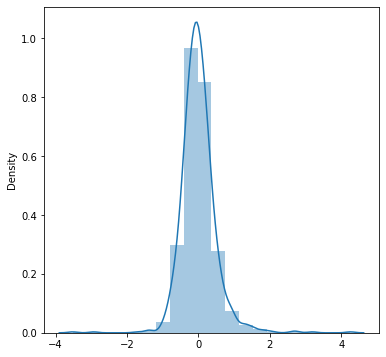

In [225]:
fig,ax=plt.subplots(figsize=(6,6))
sns.distplot((y_train-y_pred_train),bins=20)
plt.show()

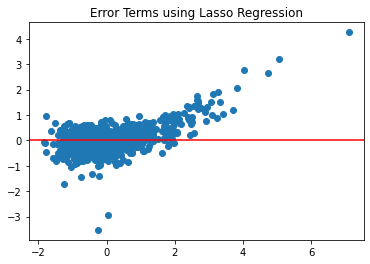

In [226]:
#Error terms analysis
plt.scatter(y_train,y_train - y_pred_train)
plt.axhline(0, color='red')
plt.title('Error Terms using Lasso Regression')
plt.show()

### Subjective Questions

Ridge X 2

In [227]:
#alpha=40  ( 20 X 2)
ridge2=Ridge(alpha=40)
ridge2.fit(X_train,y_train)
y_pred_train=ridge2.predict(X_train)
y_pred_test=ridge2.predict(X_test)
metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print("R2 Train Score:",r2_train_lr)
metric.append(r2_train_lr)
r2_test_lr=r2_score(y_test,y_pred_test)
print("R2 Test Score:", r2_test_lr)
metric.append(r2_test_lr)
rss_1=np.sum(np.square(y_train - y_pred_train))
print("RSS Training:",rss_1)
metric.append(rss_1)
rss_2=np.sum(np.square(y_test - y_pred_test))
print("RSS Test :", rss_2)
metric.append(rss_2)
mse_train=mean_squared_error(y_train,y_pred_train)
print("MSE Train :", mse_train)
metric.append(mse_train**0.5)
mse_test=mean_squared_error(y_test,y_pred_test)
print("MSE Test :", mse_test)
metric.append(mse_test**0.5)

R2 Train Score: 0.7396373556003266
R2 Test Score: 0.7495907908887729
RSS Training: 247.69971112359366
RSS Test : 127.20186789656722
MSE Train : 0.24260500599764315
MSE Test : 0.29041522350814436


Lasso X 2

In [228]:
#alpha=0.02  ( 0.01 X 2)

lasso2=Lasso(alpha=0.02)
lasso2.fit(X_train,y_train)
y_pred_train=lasso2.predict(X_train)
y_pred_test=lasso2.predict(X_test)

In [229]:

metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print("R2 Train Score:",r2_train_lr)
metric.append(r2_train_lr)
r2_test_lr=r2_score(y_test,y_pred_test)
print("R2 Test Score:", r2_test_lr)
metric.append(r2_test_lr)
rss_1=np.sum(np.square(y_train - y_pred_train))
print("RSS Training:",rss_1)
metric.append(rss_1)
rss_2=np.sum(np.square(y_test - y_pred_test))
print("RSS Test :", rss_2)
metric.append(rss_2)
mse_train=mean_squared_error(y_train,y_pred_train)
print("MSE Train :", mse_train)
metric.append(mse_train**0.5)
mse_test=mean_squared_error(y_test,y_pred_test)
print("MSE Test :", mse_test)
metric.append(mse_test**0.5)

R2 Train Score: 0.7312537095208462
R2 Test Score: 0.7452740096978627
RSS Training: 255.67561226270632
RSS Test : 129.3946891299933
MSE Train : 0.2504168582396732
MSE Test : 0.29542166468035


Observe the Beta Coeff

In [232]:
df_betas_2=pd.DataFrame(index=selected_columns)
df_betas_2.rows =selected_columns
df_betas_2['Ridge']=ridge2.coef_
df_betas_2.sort_values(by='Ridge', key=abs, ascending=False)

,Ridge
OverallQual,0.504206
2ndFlrSF,0.176244
BsmtFinType1,0.166004
MSSubClass,-0.131935
Fireplaces,0.112996
BsmtUnfSF,0.106380
BsmtExposure,0.103975
WoodDeckSF,0.089460
LotArea,0.075422
KitchenAbvGr,0.054184


In [233]:
df_betas_2=pd.DataFrame(index=selected_columns)
df_betas_2.rows =selected_columns
df_betas_2['Lasso']=lasso2.coef_
pd.set_option('display.max_rows', None)
df_betas_2.sort_values(by='Lasso', key=abs, ascending=False)

,Lasso
OverallQual,0.559568
2ndFlrSF,0.139316
BsmtFinType1,0.121786
MSSubClass,-0.110932
Fireplaces,0.107451
BsmtExposure,0.082133
WoodDeckSF,0.073613
LotArea,0.071618
BsmtUnfSF,0.057251
OpenPorchSF,0.032917


In [236]:
#Remove Top 5 variables
out_5=df_betas_2.sort_values(by='Lasso',key=abs,ascending=False).reset_index().iloc[5:,0].values

In [237]:
print(out_5)

['BsmtExposure' 'WoodDeckSF' 'LotArea' 'BsmtUnfSF' 'OpenPorchSF'
 'KitchenAbvGr' 'PavedDrive' 'LotShape' 'ScreenPorch' 'BsmtCond'
 '3SsnPorch' 'BsmtFinType2' 'Functional' 'EnclosedPorch' 'PoolArea'
 'LandSlope' 'BsmtHalfBath' 'OverallCond' 'LowQualFinSF' 'CentralAir'
 'ExterCond' 'MiscVal']
